# Experiment and Results 

### **Research question:** How does competition level affect the performance of different agent decision strategies in securing housing and the quality of the allocated house?

The research question aims to investigate on whether competition level defined by number of agents per number of houses affect the mean quality of the house taken by the agents with different algorithms. 

#### Import the necessary package and initialize the seed:

In [2]:
import random
from experiment_api import run_simulations
from policies import GreedyPolicy, ThresholdPolicy, OptimalStoppingPolicy
import house_generators
import numpy as np
import csv


random.seed(42)

## Defining the agents:

We define the agent for different competition level, given house number is fixed at 40. Number of agents are distributed equally across all strategies. 

In [3]:
#agent spec (house:agent) ratio where house number is fixed at 40

# Competition 0.5, (agents:houses) = 20 total agents: 40 houses 
agent_spec_1 = [
    {"name": "Greedy", "policy": GreedyPolicy(), "number": 5},
    {"name": "Threshold_6", "policy": ThresholdPolicy(threshold=6.0), "number": 5},
    {"name": "Threshold_8", "policy": ThresholdPolicy(threshold=8.0), "number": 5},
    {"name": "Optimal_Stopping", "policy": OptimalStoppingPolicy(exploration_ratio=0.1), "number": 5},
]

# Competition 1, (agents:houses) = 40 total agents: 40 houses
agent_spec_2 = [
    {"name": "Greedy", "policy": GreedyPolicy(), "number": 10},
    {"name": "Threshold_6", "policy": ThresholdPolicy(threshold=6.0), "number": 10},
    {"name": "Threshold_8", "policy": ThresholdPolicy(threshold=8.0), "number": 10},
    {"name": "Optimal_Stopping", "policy": OptimalStoppingPolicy(exploration_ratio=0.1), "number": 10},
]

# Competition 1.5, (agents:houses) = 60 total agents: 40 houses
agent_spec_3 = [
    {"name": "Greedy", "policy": GreedyPolicy(), "number": 15},
    {"name": "Threshold_6", "policy": ThresholdPolicy(threshold=6.0), "number": 15},
    {"name": "Threshold_8", "policy": ThresholdPolicy(threshold=8.0), "number": 15},
    {"name": "Optimal_Stopping", "policy": OptimalStoppingPolicy(exploration_ratio=0.1), "number": 15},
]

# Competition 2, (agents:houses) = 80 total agents: 40 houses
agent_spec_4 = [
    {"name": "Greedy", "policy": GreedyPolicy(), "number": 20},
    {"name": "Threshold_6", "policy": ThresholdPolicy(threshold=6.0), "number": 20},
    {"name": "Threshold_8", "policy": ThresholdPolicy(threshold=8.0), "number": 20},
    {"name": "Optimal_Stopping", "policy": OptimalStoppingPolicy(exploration_ratio=0.1), "number": 20},
]

# Competition 3, (agents:houses) = 120 total agents: 40 houses
agent_spec_5 = [
    {"name": "Greedy", "policy": GreedyPolicy(), "number": 30},
    {"name": "Threshold_6", "policy": ThresholdPolicy(threshold=6.0), "number": 30},
    {"name": "Threshold_8", "policy": ThresholdPolicy(threshold=8.0), "number": 30},
    {"name": "Optimal_Stopping", "policy": OptimalStoppingPolicy(exploration_ratio=0.1), "number": 30},
]

# Competition 5, (agents:houses) = 200 total agents: 40 houses
agent_spec_6 = [
    {"name": "Greedy", "policy": GreedyPolicy(), "number": 50},
    {"name": "Threshold_6", "policy": ThresholdPolicy(threshold=6.0), "number": 50},
    {"name": "Threshold_8", "policy": ThresholdPolicy(threshold=8.0), "number": 50},
    {"name": "Optimal_Stopping", "policy": OptimalStoppingPolicy(exploration_ratio=0.1), "number": 50},
]

# Competition 7, (agents:houses) = 280 total agents: 40 houses
agent_spec_7 = [
    {"name": "Greedy", "policy": GreedyPolicy(), "number": 70},
    {"name": "Threshold_6", "policy": ThresholdPolicy(threshold=6.0), "number": 70},
    {"name": "Threshold_8", "policy": ThresholdPolicy(threshold=8.0), "number": 70},
    {"name": "Optimal_Stopping", "policy": OptimalStoppingPolicy(exploration_ratio=0.1), "number": 70},
]

# Competition 10, (agents:houses) = 400 total agents: 40 houses
agent_spec_8 = [
    {"name": "Greedy", "policy": GreedyPolicy(), "number": 100},
    {"name": "Threshold_6", "policy": ThresholdPolicy(threshold=6.0), "number": 100},
    {"name": "Threshold_8", "policy": ThresholdPolicy(threshold=8.0), "number": 100},
    {"name": "Optimal_Stopping", "policy": OptimalStoppingPolicy(exploration_ratio=0.1), "number": 100},
]

# Competition 15, (agents:houses) = 600 total agents: 40 houses
agent_spec_9 = [
    {"name": "Greedy", "policy": GreedyPolicy(), "number": 150},
    {"name": "Threshold_6", "policy": ThresholdPolicy(threshold=6.0), "number": 150},
    {"name": "Threshold_8", "policy": ThresholdPolicy(threshold=8.0), "number": 150},
    {"name": "Optimal_Stopping", "policy": OptimalStoppingPolicy(exploration_ratio=0.1), "number": 150},
]

# Competition 20, (agents:houses) = 800 total agents: 40 houses
agent_spec_10 = [
    {"name": "Greedy", "policy": GreedyPolicy(), "number": 200},
    {"name": "Threshold_6", "policy": ThresholdPolicy(threshold=6.0), "number": 200},
    {"name": "Threshold_8", "policy": ThresholdPolicy(threshold=8.0), "number": 200},
    {"name": "Optimal_Stopping", "policy": OptimalStoppingPolicy(exploration_ratio=0.1), "number": 200},
]

agent_spec_dict = {
    "Competition 0.5": agent_spec_1, 
    "Competition 1": agent_spec_2, 
    "Competition 1.5": agent_spec_3, 
    "Competition 2": agent_spec_4,
    "Competition 3": agent_spec_5,
    "Competition 5": agent_spec_6,
    "Competition 7": agent_spec_7,
    "Competition 10": agent_spec_8,
    "Competition 15": agent_spec_9,
    "Competition 20": agent_spec_10
}

### Collecting data

Run simulations across all 10 competition levels (0.5 to 20) with 100 independent experiments each. For each competition level, generate 40 houses with normal quality distribution (1-10) and run agents with different policies (Greedy, Threshold-6, Threshold-8, Optimal Stopping) to collect match rates, quality scores, and rounds-to-match data.

In [9]:
for competition_level, agent_spec in agent_spec_dict.items():
    print(f"\n{'='*130}")
    print(f"COMPETITION LEVEL: {competition_level}")
    print(f"{'='*130}\n")
    
    #Generating houses
    n_houses = 40
    house_gen = house_generators.uniform_house_generator(n_houses=40, min_quality=1.0, max_quality=10.0)

    #Count total number of agents
    total_agents = sum(a.get("number", 1) for a in agent_spec)
    max_iter = min(n_houses, total_agents) * 2

    #Run the simulation
    results = run_simulations(
        agent_specification=agent_spec,
        house_generator=house_gen,
        num_experiments=100,
        max_iter=max_iter
    )

    #Metrics of the simulation
    print(f"Average efficiency: {np.mean(results.efficiency_scores):.3f} ± {np.std(results.efficiency_scores):.3f}")
    print(f"Average match rate: {np.mean(results.match_rates):.3f} ± {np.std(results.match_rates):.3f}")
    print(f"Average rounds: {np.mean(results.rounds_taken):.1f} ± {np.std(results.rounds_taken):.1f}")

    #Results
    print(f"\nNumber of rounds: {results.num_experiments}")
    print("POLICY PERFORMANCE:")
    print("-" * 130)
    print(f"{'Policy':<20} {'Match Rate':<12} {'Avg Quality':<12} {'Avg Rounds':<12} {'Avg Rounds with Unmatched':<28} {'Number of Matches':<18} {'Number of Unmatch':<10}")
    print("-" * 130)

    for policy_name, stats in results.policy_stats.items():
        match_rate = stats['matches'] / stats['total_agents']
        avg_quality = np.mean(stats['qualities']) if stats['qualities'] else 0
        avg_rounds = np.mean(stats['rounds_to_match']) if stats['rounds_to_match'] else 0
        avg_rounds_with_unmatched = np.mean(stats['rounds_all_agents']) if stats['rounds_all_agents'] else 0
        
        print(f"{policy_name:<20} "
                f"{match_rate:<12.3f} "
                f"{avg_quality:<12.3f} "
                f"{avg_rounds:<12.1f} "
                f"{avg_rounds_with_unmatched:<29.1f}"
                f"{stats['matches']:<18} "
                f"{stats['unmatches']:<12}")
    print("=" * 130)


COMPETITION LEVEL: Very low competition

Average efficiency: 0.896 ± 0.034
Average match rate: 1.000 ± 0.000
Average rounds: 39.8 ± 1.6

Number of rounds: 100
POLICY PERFORMANCE:
----------------------------------------------------------------------------------------------------------------------------------
Policy               Match Rate   Avg Quality  Avg Rounds   Avg Rounds with Unmatched    Number of Matches  Number of Unmatch
----------------------------------------------------------------------------------------------------------------------------------
Greedy               1.000        5.646        1.0          1.0                          500                0           
Threshold_6          1.000        7.945        3.1          3.1                          500                0           
Threshold_8          1.000        7.971        12.2         12.2                         500                0           
Optimal_Stopping     1.000        6.216        24.1         24.1     

### Export Per-Simulation Data to CSV

In [8]:
import pandas as pd

# Collect all per-simulation data
all_rows = []

for competition_level, agent_spec in agent_spec_dict.items():
    # Generating houses
    n_houses = 40
    house_gen = house_generators.uniform_house_generator(n_houses=40, min_quality=1.0, max_quality=10.0)
    
    # Count total number of agents
    total_agents = sum(a.get("number", 1) for a in agent_spec)
    max_iter = min(n_houses, total_agents) * 2
    
    # Run the simulation
    results = run_simulations(
        agent_specification=agent_spec,
        house_generator=house_gen,
        num_experiments=100,
        max_iter=max_iter
    )
    
    # Extract per-simulation results
    for sim_result in results.simulation_results:
        for policy_name, policy_data in sim_result.policy_results.items():
            row = {
                'competition_level': competition_level,
                'simulation_id': sim_result.simulation_id,
                'policy': policy_name,
                'efficiency_score': sim_result.efficiency_score,
                'overall_match_rate': sim_result.match_rate,
                'total_rounds': sim_result.rounds_taken,
                'policy_matches': policy_data['matches'],
                'policy_unmatches': policy_data['unmatches'],
                'policy_total_agents': policy_data['total_agents'],
                'policy_match_rate': policy_data['matches'] / policy_data['total_agents'],
                'avg_quality': np.mean(policy_data['qualities']) if policy_data['qualities'] else 0,
                'avg_rounds_matched': np.mean(policy_data['rounds_to_match']) if policy_data['rounds_to_match'] else 0,
                'avg_rounds_all': np.mean(policy_data['rounds_all_agents']) if policy_data['rounds_all_agents'] else 0
            }
            all_rows.append(row)

# save the data to CSV
df = pd.DataFrame(all_rows)
df.to_csv('simulation_results.csv', index=False)


### Figure 1 - Match Rate vs Competition Level

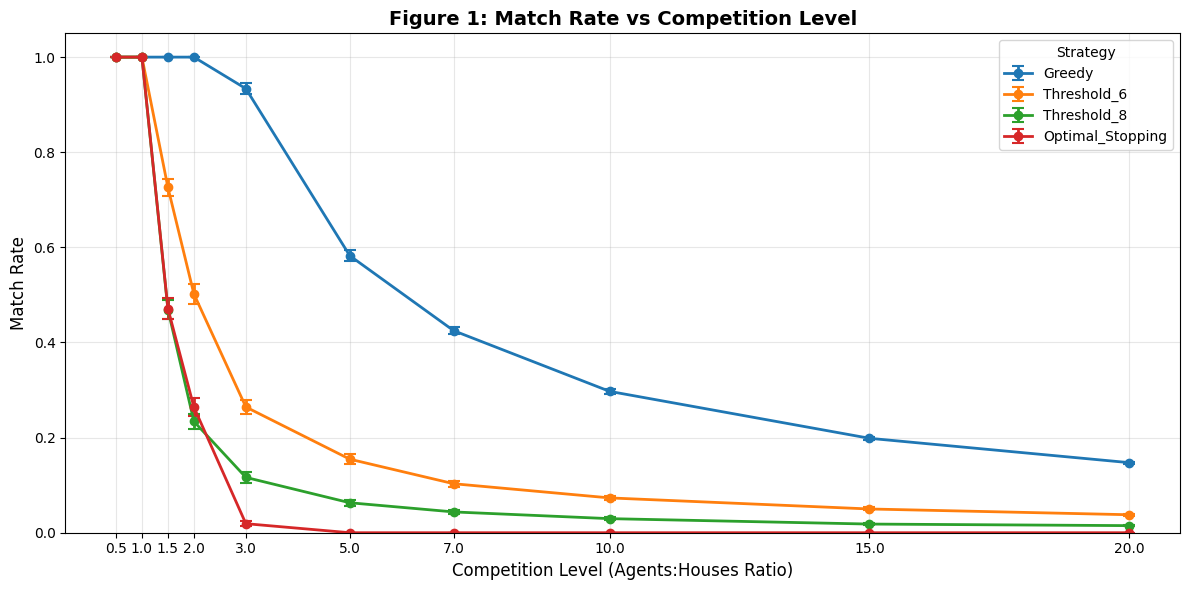

In [5]:
import matplotlib.pyplot as plt

# Read the summary CSV file
match_rate_summary = pd.read_csv('summary_match_rate.csv')

# Map competition levels to numeric values
competition_map = {
    0.5: 0.5,
    1: 1,
    1.5: 1.5,
    2: 2,
    3: 3,
    5: 5,
    7: 7,
    10: 10,
    15: 15,
    20: 20
}

#plot
plt.figure(figsize=(12, 6))

# Plot each policy as a separate line with error bars
for policy in ['Greedy', 'Threshold_6', 'Threshold_8', 'Optimal_Stopping']:
    policy_data = match_rate_summary[match_rate_summary['policy'] == policy].sort_values('competition')
    
    # Calculate error bar values (distance from mean to CI bounds)
    lower_error = policy_data['mean_match'] - policy_data['ci_low']
    upper_error = policy_data['ci_high'] - policy_data['mean_match']
    
    plt.errorbar(policy_data['competition'], policy_data['mean_match'], yerr=[lower_error, upper_error], marker='o', linewidth=2, capsize=4, capthick=1.5, label=policy)

plt.xlabel('Competition Level (Agents:Houses Ratio)', fontsize=12)
plt.ylabel('Match Rate', fontsize=12)
plt.title('Figure 1: Match Rate vs Competition Level', fontsize=14, fontweight='bold')
plt.legend(title='Strategy', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks([0.5, 1, 1.5, 2, 3, 5, 7, 10, 15, 20])
plt.ylim(0, 1.05)

plt.tight_layout()
plt.show()



### Figure 2 - Average Matched-House Quality vs Competition Level

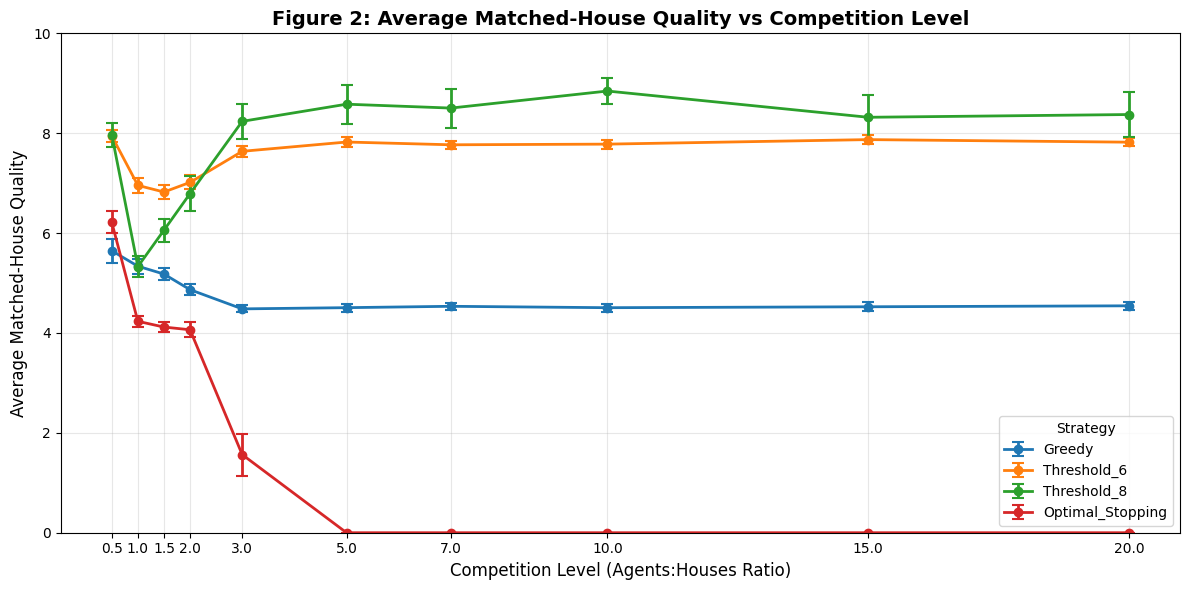

In [ ]:
import matplotlib.pyplot as plt

# Read the summary CSV file
quality_summary = pd.read_csv('summary_avg_quality.csv')

# Map competition levels to numeric values
competition_map = {
    0.5: 0.5,
    1: 1,
    1.5: 1.5,
    2: 2,
    3: 3,
    5: 5,
    7: 7,
    10: 10,
    15: 15,
    20: 20
}

#make plot
plt.figure(figsize=(12, 6))

# Plot with error bars
for policy in ['Greedy', 'Threshold_6', 'Threshold_8', 'Optimal_Stopping']:
    policy_data = quality_summary[quality_summary['policy'] == policy].sort_values('competition')
    
    # Calculate error bar values (distance from mean to CI bounds)
    lower_error = policy_data['mean_quality'] - policy_data['ci_low']
    upper_error = policy_data['ci_high'] - policy_data['mean_quality']
    
    plt.errorbar(policy_data['competition'], policy_data['mean_quality'], yerr=[lower_error, upper_error], marker='o', linewidth=2, capsize=4, capthick=1.5, label=policy)

plt.xlabel('Competition Level (Agents:Houses Ratio)', fontsize=12)
plt.ylabel('Average Matched-House Quality', fontsize=12)
plt.title('Figure 2: Average Matched-House Quality vs Competition Level', fontsize=14, fontweight='bold')
plt.legend(title='Strategy', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks([0.5, 1, 1.5, 2, 3, 5, 7, 10, 15, 20])
plt.ylim(0, 10)
plt.tight_layout()
plt.show()

### Figure 3 - Rounds to Match vs Competition Level

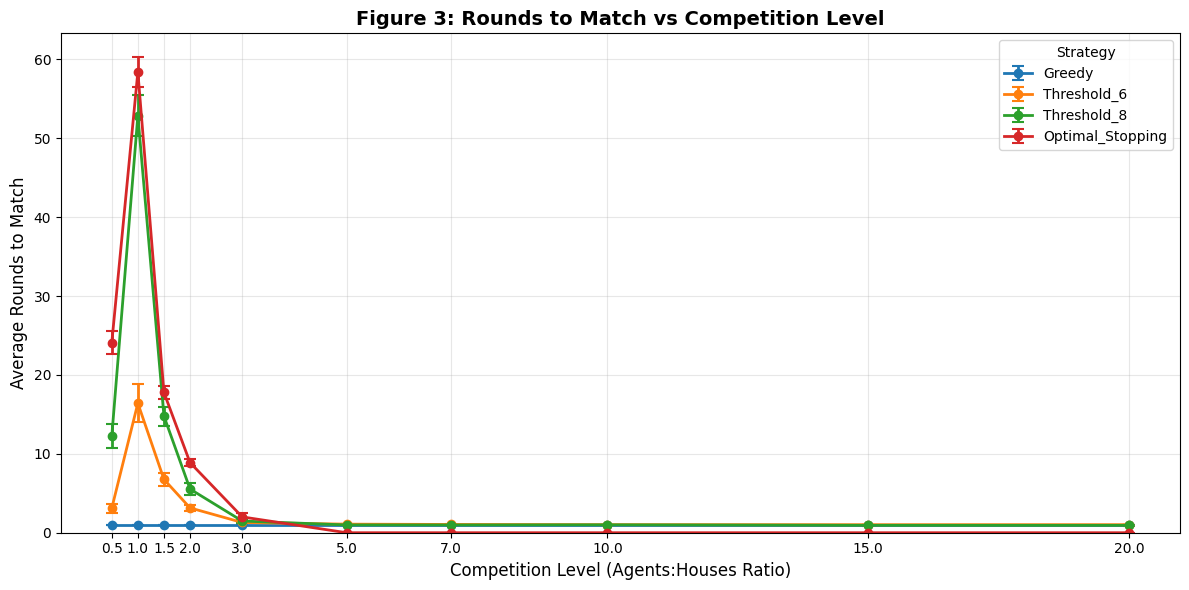

In [ ]:
import matplotlib.pyplot as plt

# Read the summary CSV file
rounds_summary = pd.read_csv('summary_avg_rounds_matched.csv')

# Map competition levels to numeric values
competition_map = {
    0.5: 0.5,
    1: 1,
    1.5: 1.5,
    2: 2,
    3: 3,
    5: 5,
    7: 7,
    10: 10,
    15: 15,
    20: 20
}

#make plot
plt.figure(figsize=(12, 6))

# Plot with error bars
for policy in ['Greedy', 'Threshold_6', 'Threshold_8', 'Optimal_Stopping']:
    policy_data = rounds_summary[rounds_summary['policy'] == policy].sort_values('competition')
    
    # Calculate error bar values (distance from mean to CI bounds)
    lower_error = policy_data['mean_rounds'] - policy_data['ci_low']
    upper_error = policy_data['ci_high'] - policy_data['mean_rounds']
    
    plt.errorbar(policy_data['competition'], policy_data['mean_rounds'], yerr=[lower_error, upper_error], marker='o', linewidth=2, capsize=4, capthick=1.5, label=policy)

plt.xlabel('Competition Level (Agents:Houses Ratio)', fontsize=12)
plt.ylabel('Average Rounds to Match', fontsize=12)
plt.title('Figure 3: Rounds to Match vs Competition Level', fontsize=14, fontweight='bold')
plt.legend(title='Strategy', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks([0.5, 1, 1.5, 2, 3, 5, 7, 10, 15, 20])
plt.ylim(0, None)
plt.tight_layout()
plt.show()